<a href="https://colab.research.google.com/github/yoosoo13/yoosoo13/blob/main/%ED%98%BC%EA%B3%B5%ED%8C%8C/%ED%98%BC%EA%B3%B5%ED%8C%8C4_%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google .colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 데이터 다운
import gdown
gdown.download('https://bit.ly/3736JW1', 'ns_book6.csv', quiet = False)

Downloading...
From: https://bit.ly/3736JW1
To: /content/ns_book6.csv
100%|██████████| 55.0M/55.0M [00:02<00:00, 19.4MB/s]


'ns_book6.csv'

In [3]:
# 데이터 불러오기
import pandas as pd
ns_book6 = pd.read_csv('ns_book6.csv', low_memory=False)
ns_book6.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [4]:
# 데이터프레임 열 정보 요약 : info()메서드_ 각 열의 데이터 타입과 누락된 데이터(non-null 개수와 결측치가 있는 열)에 대한 정보를 요약
ns_book6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379976 entries, 0 to 379975
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   번호       379976 non-null  int64  
 1   도서명      379976 non-null  object 
 2   저자       379976 non-null  object 
 3   출판사      379976 non-null  object 
 4   발행년도     379976 non-null  float64
 5   ISBN     379976 non-null  object 
 6   세트 ISBN  56544 non-null   object 
 7   부가기호     308589 non-null  object 
 8   권        62092 non-null   object 
 9   주제분류번호   360247 non-null  object 
 10  도서권수     379976 non-null  int64  
 11  대출건수     379976 non-null  int64  
 12  등록일자     379976 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 37.7+ MB


In [5]:
# 데이터프레임 기술통계 요약 : describ()메서드_숫자형 데이터에 대해 각 열(컬럼)의 평균, 표준편차, 최소값, 최대값, 백분위수 등을 제공
ns_book6.describe()

,번호,발행년도,도서권수,대출건수
count,379976.000000,379976.000000,379976.000000,379976.000000
mean,201726.332847,2008.516306,1.135874,11.504629
std,115836.454596,8.780529,0.483343,19.241926
min,1.000000,1947.000000,0.000000,0.000000
25%,102202.750000,2003.000000,1.000000,2.000000
50%,203179.500000,2009.000000,1.000000,6.000000
75%,301630.250000,2015.000000,1.000000,14.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [6]:
# '도서권수' 최솟값 : 0 == '원래는 소장한 도서지만, 분실?', '더 이상 대출할 수 없는 도서?' → 걸러내야 할지 고려하기!
# 불리언배열, sum()함수로 '도서권수'가 0인 도서의 행 개수 count
sum(ns_book6['도서권수']== 0)

3206

In [7]:
# '도서권수'가 0인 값은 3206개 > 전체 '도서권수'가 379976개 인 점을 고려하면, 무시할 법 하지만, 제외시키겠음
# ns_book7은 ns_book6의 '도서권수'가 0보다 큰 값들만 가지고 있는 데이터프레임으로 지정
ns_book7 = ns_book6[ns_book6['도서권수'] >0 ]
ns_book7.describe()

,번호,발행년도,도서권수,대출건수
count,376770.000000,376770.000000,376770.000000,376770.000000
mean,202977.476649,2008.460076,1.145540,11.593439
std,115298.245784,8.773148,0.473853,19.279409
min,1.000000,1947.000000,1.000000,0.000000
25%,104488.250000,2003.000000,1.000000,2.000000
50%,204550.500000,2009.000000,1.000000,6.000000
75%,302346.750000,2015.000000,1.000000,14.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [8]:
# 25%, 50%, 75%이외에 30%, 60%, 90%에 위치한 값을 보고 싶다면, percentiles()매개변수 사용
ns_book7.describe(percentiles=[0.3,0.6,0.9])

,번호,발행년도,도서권수,대출건수
count,376770.000000,376770.000000,376770.000000,376770.000000
mean,202977.476649,2008.460076,1.145540,11.593439
std,115298.245784,8.773148,0.473853,19.279409
min,1.000000,1947.000000,1.000000,0.000000
30%,124649.700000,2004.000000,1.000000,2.000000
50%,204550.500000,2009.000000,1.000000,6.000000
60%,243537.400000,2011.000000,1.000000,8.000000
90%,361341.100000,2018.000000,2.000000,28.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [9]:
# 수치형 열이 아닌 다른 열의 데이터 타입에 대한 기술통계를 보고 싶다면, include()매개변수 사용
ns_book7.describe(include='object')

# count = 누락된 값을 제외한 데이터 개수
# unique = 고유한 값의 개수
# top = 가장 많이 등장하는 값
# freq = top 행에 등장하는 항목의 빈도수
# 아래의 결과에 따르면, '도서명'열에서 가장 많이 등장하는 데이터는 '승정원일기'로 250회가 나옴을 확인

,도서명,저자,출판사,ISBN,세트 ISBN,부가기호,권,주제분류번호,등록일자
count,376770,376770,376770,376770,55866,308252,61793,359792,376770
unique,336408,248850,21875,350810,14875,17,834,12467,4562
top,승정원일기,세종대왕기념사업회 [편],문학동네,9788937430299,9788937460005,0,1,813.6,1970-01-01
freq,250,303,4410,206,702,158235,13282,14816,28185


____
# 참고
- 평균
- 중앙값
- 최솟값
- 최댓값
- 분위수
- 분산
- 표준편차
- 최빈값

## 평균 : mean()
- 숫자 값을 모두 더해 개수로 나눈 것


In [10]:
x = [10,20,30]
sum = 0
for i in range(3):
  sum += x[i]
print('평균:', sum/len(x))

평균: 20.0


In [11]:
# mean()
ns_book7['대출건수'].mean()

11.593438968070707

## 중앙값 : median()
- 전체 데이터를 순서대로 늘어 놓았을 때 중앙에 위치한 값
- describe()메서드에서 50% 위치의 값

In [12]:
# 데이터 개수가 홀수일 때, 정확히 가운데 놓인 값이 중앙값
# 데이터 개수가 짝수일 때, 가운데 두 개의 값을 평균하여 중앙값
temp_df = pd.DataFrame([1,2,3,4])
temp_df.median()

0    2.5
dtype: float64

In [13]:
# median()
ns_book7['대출건수'].median()

6.0

In [14]:
# 중복갓 제거하고 중앙값 구하기
ns_book7['대출건수'].drop_duplicates().median()

# '대출건수'를 중복제거하지 않은 중앙값은 6.0이었는데, 중복제거 후의 중앙값은 183.0인 것으로 보아 → '대출건수'에 작은 값의 중복된 행이 多임을 예상할 수 있음

183.0

## 최솟값 : min()
## 최댓값 : max()

In [15]:
# min()
ns_book7['대출건수'].min()

# 대출이 한번도 되지 않은 책이 있음을 알 수 있음

0

In [16]:
# max()
ns_book7['대출건수'].max()

# ns_book의 기간이 한달 분량이므로, 어떤 도서는 한 달 동안 1,765번 대출이 된 점을 알 수 있음

1765

## 분위수 : quantile()
- 데이터를 순서대로 늘어 놓았을 때 이를 균등한 가격으로 나누는 기준점
<div>
<img src=https://t4.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/4k6/image/tqjP2RHjOk-XqyZ3QBQz6SMdxOg.png width=400
</div>



In [26]:
# 1,2,3,4,5 다섯 개의 숫자가 있을 때, 90%에 위치한 값은?
pd.Series([1,2,3,4,5]).quantile(0.9, interpolation = 'midpoint')

4.5

In [22]:
# quantile()
ns_book7['대출건수'].quantile()

6.0

In [23]:
ns_book7['대출건수'].quantile(0.25)

2.0

In [24]:
ns_book7['대출건수'].quantile([0.25, 0.5, 0.75])

0.25     2.0
0.50     6.0
0.75    14.0
Name: 대출건수, dtype: float64

In [30]:
# 남산도서관 대출 데이터에서 '대출건수'가 10인 백분위 찾기

# 1. '대출건수' 열의 값이 10보다 작은지 비교하는 불리언 배열 생성
borrow_10_flag = ns_book7['대출건수'] < 10

print(borrow_10_flag.mean())  # 10보다 작은 값이 차지하는 비율 0.65 == 10에 대한 백분위
print(ns_book7['대출건수'].quantile(0.65))

0.6402712530190833
10.0


## 분산 : variance → var()
- 평균으로부터 데이터가 얼마나 퍼져있는지를 나타내는 통계량
- 데이터의 각 값에서 평균을 뺀 다음 제곱한 후 평균처럼 샘플 개수로 나누어 구할 수 있음


<div>
<img src = 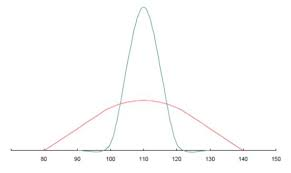 width=400
</div>

- 데이터가 가운데 모여있으면, 분산이 작음 (파란색 선)
- 데이터가 넓게 퍼져있으면, 분산이 큼 (빨간색 선)

In [32]:
# var()
ns_book7['대출건수'].var()

# 해당 값으로는 작은지 큰지 판단하기 어렵다 → (보완) 표준편차 사용

371.69563042906674

## 표준편차 :  standard deviation → std()
- 분산_var()에 제급근을 한 것으로 수식기호는 s를 사용
- 평균을 중심으로 데이터가 대략 얼만큼 떨어져 분표해 있는지 표현하는 값


In [36]:
# std()
print("'대출건수'의 표준편차 : ", ns_book7['대출건수'].std())

# mean()
print( "'대출건수'의 평균 : ", ns_book7['대출건수'].mean())

# 도서 '대출건수'의 평균은 11회정도인데 표준편차가 19면 너무 큰데? → 게다가 '대출건수'는 음수가 될 수 없어 → 평균보다 훨씬 더 큰 '대출건수'가 있기 때문에, 표준편차가 큰 것으로 예상

'대출건수'의 표준편차 :  19.279409493785508
'대출건수'의 평균 :  11.593438968070707


In [39]:
import numpy as np

# 각 '대출건수'열의 값에서 평균을 빼기
diff = ns_book7['대출건수'] - ns_book7['대출건수'].mean()

# 분산의 제곱근을 구하기
np.sqrt(np.sum(diff**2) / (len(ns_book7)-1))

19.279409493785508

## 최빈값 : mode()
- 데이터에서 가장 많이 등장하는 값
- mode()메서드는 텍스트, 수치형에도 적용가능함
- describe(include='object')출력 중 top이 나온 값 == 최빈값

In [40]:
# mode()
# '도서명'에서 가장 많이 등장하는 값 확인
ns_book7['도서명'].mode()

0    승정원일기
Name: 도서명, dtype: object

In [41]:
# 남산도서관 대출 데이터에서 가장 많이 등장하는 '연도'확인
ns_book7['발행년도'].mode()

0    2012.0
Name: 발행년도, dtype: float64

_____
# 데이터프레임에서 기술통계 구하기

In [42]:
ns_book7.mean(numeric_only=True)  # numeric_only = True : 수치형 열만 연산가

번호      202977.476649
발행년도      2008.460076
도서권수         1.145540
대출건수        11.593439
dtype: float64

In [43]:
ns_book7.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [44]:
# '번호'열은 모두 고유한 값이므로 최빈값(mode)을 찾는 의미가 없음 → loc메서드로 '도서명'열 부터 마지막 열까지에 대해 최빈값 구해보기
ns_book7.loc[:,'도서명':].mode()

# !주의! 각 열에 대한 최빈값(mode)을 구한 것이므로, 현재 나와있는 '도서명' : 승정원일기의 '출판사'는 문학동네가 아닐 수 있음!

,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,승정원일기,세종대왕기념사업회 [편],문학동네,2012.0,9788937430299,9788937460005,0,1,813.6,1,0,1970-01-01


In [45]:
# '도서명'이 승정원일기인 '출판사'확인해보자

# 1. '도서명'이 승정원일기인 행을 추출
ns_title= ns_book7['도서명'] == '승정원일기'
filter_rows = ns_book7[ns_title]

# 2. 조건에 맞는 행을 추출(현재, '도서명'이 승정원일기인 '출판사'확인)
publishers = filter_rows['출판사']
print(publishers)

# '도서명'이 승정원일기인 '출판사'는 한국고전번역원, 민족문화추친회 등이 있음을 알 수 있다.

147545    한국고전번역원
147546    한국고전번역원
147547    한국고전번역원
147548    한국고전번역원
147549    한국고전번역원
           ...   
362250    민족문화추진회
362251    민족문화추진회
362252    민족문화추진회
362253    민족문화추진회
362254    민족문화추진회
Name: 출판사, Length: 250, dtype: object


In [46]:
# '도서명'이 승정원일기인 '출판사'가 여러군데임을 확인 → '출판사'중복을 제거하여 하나의 리스트로 확인하고 싶다
ns_title= ns_book7['도서명'] == '승정원일기'
filter_rows = ns_book7[ns_title]
publishers = filter_rows['출판사']

# 1. '출판사'를 추출하여 리스트로 저장
publishers_list = filter_rows['출판사'].tolist()

# 2. '출판사' 중복 제거
unique_publishers = list(set(publishers_list))
print(unique_publishers)

['한국고전번역원', '나남출판', '민족문화추진회']


In [47]:
# 저장
ns_book7.to_csv('ns_book7.csv', index=False)

__________
# 넘파이의 기술통계 함수

## 평균
- mean()
- average() :가중평균

In [48]:
# mean()
import numpy as np
np.mean(ns_book7['대출건수'])

11.593438968070707

In [49]:
# 가중평균 : average()
## 예. '도서권수'가 10권이 있는 도서는 '대출건수'를 10배로 줄여 → '도서권수'가 많을 수록, '대출건수'에 낮은 가중치를 줌
np.average(ns_book7['대출건수'], weights = 1 / ns_book7['도서권수'])

10.543612175385386

In [51]:
# 모든 '도서권수'가 1인 상황 → '도서권수'에 따라 '대출건수'에 미치는 영향을 덜 받음
np.mean(ns_book7['대출건수'] / ns_book7['도서권수'])

9.873029861445774

In [52]:
# 도서에 상관없이 '한 권당 대출건수'를 구하기 == '전체 대출건수'를 모두 더한 다음 '전체 도서권수'로 나누기
ns_book7['대출건수'].sum() / ns_book7['도서권수'].sum()

10.120503701300958

## 중앙값 : median()

In [53]:
np.median(ns_book7['대출건수'])

6.0

## 최솟값 : min(), 최댓갓 : max()

In [54]:
# min
np.min(ns_book7['대출건수'])

0

In [55]:
# max
np.max(ns_book7['대출건수'])

1765

## 분위수 : quantile()

In [56]:
np.quantile(ns_book7['대출건수'], [0.25, 0.5, 0.75])

array([ 2.,  6., 14.])

## 분산 : var()
- 판다스 분산과 넘파이 분산이 소수점 셋째 자리부터 조금씩 차이가 남 → '자유도(df)'차이 때문
  - 판다스 분산_자유도(df) == n-1
  - 넘파이 분산_자유도(df) == n

In [57]:
np.var(ns_book7['대출건수'])

371.6946438971496

In [58]:
# 판다스 분산
ns_book7['대출건수'].var()

371.69563042906674

## 표준편차 : std()
- 판다스 자유도(df) == n-1
- 넘파이 자유도(df) == n

In [59]:
np.std(ns_book7['대출건수'])

19.27938390865096

In [60]:
ns_book7['대출건수'].std()

19.279409493785508

## 최빈값
- 판다스 최빈값 : mode()
- 넘파이 최빈값 : 제공안함
  - unique()함수로 넘파이 최빈값 구할 수 있음

In [65]:
# 넘파이 최빈값

# 1. unique()함수 호출 → 고유한 값(values), 등장 횟수(counts) 배열 획득
values, counts = np.unique(ns_book7['도서명'], return_counts = True)

# 2. counts 배열에서 가장 큰 값의 인덱스 찾기 : argmax()함수 사용
max_idx = np.argmax(counts)

values[max_idx]

'승정원일기'